<a href="https://colab.research.google.com/github/O-suke12/MachineLearning/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import pandas as pd


# **K-means Clustering**

In [107]:
np.random.seed(10)
n = 15
X = np.random.rand(n,2)*10
X

array([[7.71320643, 0.20751949],
       [6.33648235, 7.48803883],
       [4.98507012, 2.24796646],
       [1.98062865, 7.60530712],
       [1.69110837, 0.88339814],
       [6.85359818, 9.53393346],
       [0.03948266, 5.12192263],
       [8.12620962, 6.12526067],
       [7.21755317, 2.91876068],
       [9.17774123, 7.14575783],
       [5.42544368, 1.42170048],
       [3.7334076 , 6.74133615],
       [4.41833174, 4.34013993],
       [6.17766978, 5.13138243],
       [6.50397182, 6.01038953]])

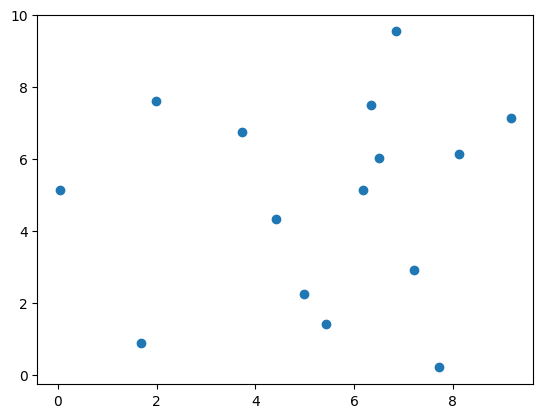

In [ ]:
plt.scatter(X[:,0],X[:,1])

In [268]:
num_centroid = 3
centroid = np.random.choice(n, size=num_centroid, replace=False)
center_loc = np.array([X[i] for i in centroid])

d = {'number': [], 'group': []}
df = pd.DataFrame(data=d)
for i in range(num_centroid):
  row =  pd.DataFrame({'number': [centroid[i]], 'group': [i]})
  df = pd.concat((df,row), ignore_index=True)

for i in range(n):
  cluster_num = np.argmin([np.sum(pow(X[i]-X[centroid[j]],2)) for j in range(num_centroid)])
  row =  pd.DataFrame({'number': [i], 'group': [cluster_num]})
  df = pd.concat((df,row), ignore_index=True)
df

,number,group
0,14.0,0.0
1,8.0,1.0
2,3.0,2.0
3,0.0,1.0
4,1.0,0.0
5,2.0,1.0
6,3.0,2.0
7,4.0,1.0
8,5.0,0.0
9,6.0,2.0


[[1, 2], [0]]